In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
data = pd.read_csv("F:\\Python work\\titanic\\insurance (1).csv")
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
sex = data.groupby(by = 'sex').size()
print(sex)
smoker = data.groupby(by = 'smoker').size()
print(smoker)
region = data.groupby(by = 'region').size()
print(region)

sex
female    662
male      676
dtype: int64
smoker
no     1064
yes     274
dtype: int64
region
northeast    324
northwest    325
southeast    364
southwest    325
dtype: int64


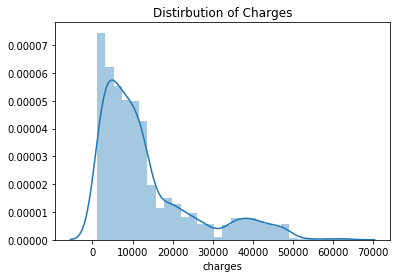

In [6]:
## check the distribution of charges
distPlot = sns.distplot(data['charges'])
plt.title("Distirbution of Charges")
plt.show(distPlot)

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64
1387.1723338865468


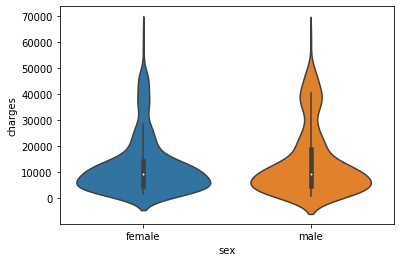

In [7]:
## check charges vs features
meanGender = data.groupby(by = "sex")["charges"].mean()
print(meanGender)
print(meanGender["male"] - meanGender["female"])
boxPlot1 = sns.violinplot(x = "sex", y = "charges", data = data)

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64
23615.96353367665


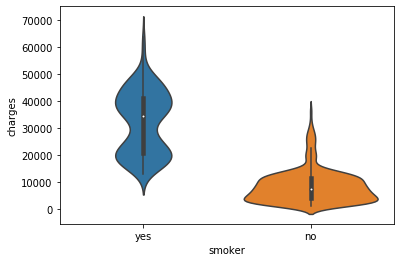

In [9]:
## check charges vs features
meanSmoker = data.groupby(by = "smoker")["charges"].mean()
print(meanSmoker)
print(meanSmoker["yes"] - meanSmoker["no"])
boxPlot1 = sns.violinplot(x = "smoker", y = "charges", data = data)

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64


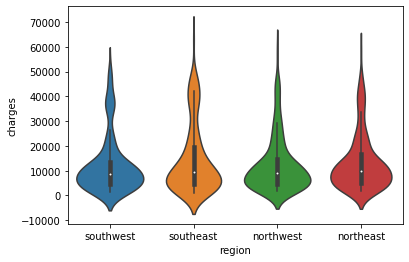

In [10]:
## check charges vs features
meanRegion = data.groupby(by = "region")["charges"].mean()
print(meanRegion)
boxPlot3 = sns.violinplot(x = "region", y = "charges", data = data)

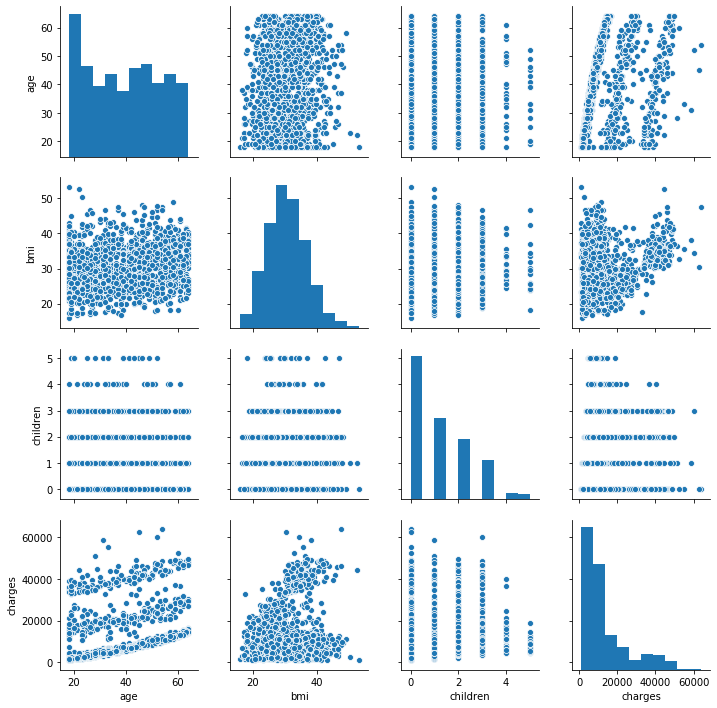

In [8]:
pairPlot = sns.pairplot(data)

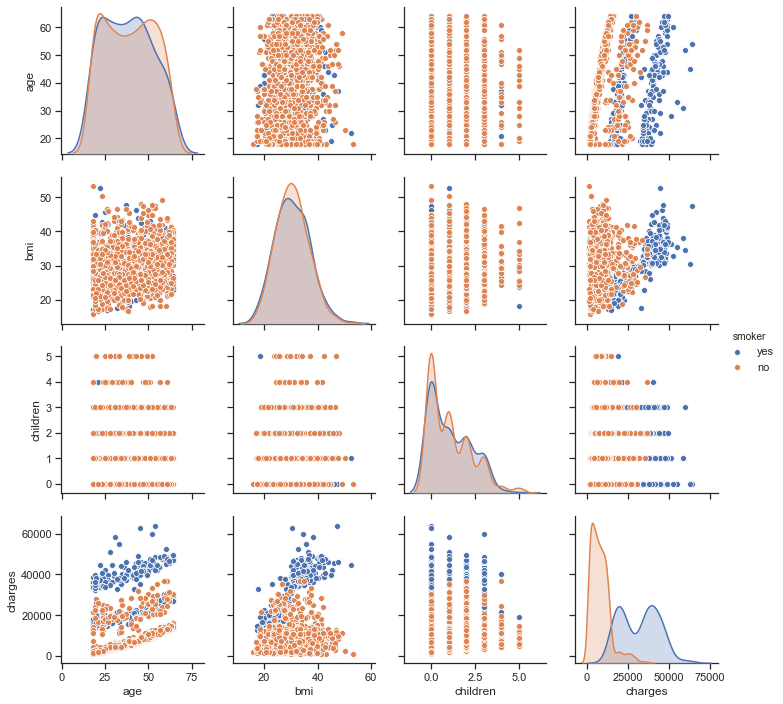

In [11]:
##smokers vs non-smokers
sns.set(style = "ticks")
smokerPairs = sns.pairplot(data, hue = "smoker")

In [12]:
## Dummify sex, smoker and region
scaleMinMax = MinMaxScaler()
data[["age", "bmi", "children"]] = scaleMinMax.fit_transform(data[["age", "bmi", "children"]])
data = pd.get_dummies(data, prefix = ["sex", "smoker", "region"])
## retain sex = male, smoker = yes, and remove 1 region = northeast to avoid dummytrap
data = data.drop(data.columns[[4,6,11]], axis = 1)
head = data.head()
print(head)

        age       bmi  children      charges  sex_male  smoker_yes  \
0  0.021739  0.321227       0.0  16884.92400         0           1   
1  0.000000  0.479150       0.2   1725.55230         1           0   
2  0.217391  0.458434       0.6   4449.46200         1           0   
3  0.326087  0.181464       0.0  21984.47061         1           0   
4  0.304348  0.347592       0.0   3866.85520         1           0   

   region_northeast  region_northwest  region_southeast  
0                 0                 0                 0  
1                 0                 0                 1  
2                 0                 0                 1  
3                 0                 1                 0  
4                 0                 1                 0  


In [16]:
## Quantifying the effect of the features to the medical charges
##We have already visualized the relationship of variables to charges. 
##Now we will further investigate by looking at the relationships using multiple linear regression.
##The aim of this section is to quantify the relationship and not to create the prediction model. Let us first create a training and testing data set to proceed.
##Based on the visualization, we can make a couple of hypothesis about the relationship.
##There is no real difference in charges between gender or regions.
##The charge for smokers are very much higher than the non-smokers.
##The charge gets higher as the individual gets older.
##Lastly, the charge is higher for those who have fewer number of children.

X = data.drop(data.columns[[3]], axis = 1)
Y = data.iloc[:, 3]
X_train, x_test, Y_train, y_test = train_test_split(X, Y, random_state = 0)

In [17]:
import statsmodels.api as sm
from scipy import stats

X_train2 = sm.add_constant(X_train)
linearModel = sm.OLS(Y_train, X_train2)
linear = linearModel.fit()
print(linear.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     343.0
Date:                Sat, 23 May 2020   Prob (F-statistic):          1.08e-279
Time:                        17:07:41   Log-Likelihood:                -10176.
No. Observations:                1003   AIC:                         2.037e+04
Df Residuals:                     994   BIC:                         2.041e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2585.6935    702.669  

In [18]:
##There is no real difference in charges between gender or regions.
##Result: The p-value is 0.973 indicating there is no statistical difference between the gender or region group.

##The charge for smokers are very much higher than the non-smokers.
##Result: The p-value is 0.000 which indicates that there is a difference between the group.

##The charge gets higher as the individual gets older.
## Result: The p-value is 0.000 which indicates that the charge is higher as the individual gets older.

##The charge gers higher as the BMI gets higher.
##Result: The p-values is 0.000 which indicates that the charge is higher as the BMI gets higher.

##Lastly, there is significant decrease in charges as the number of children increases.
##Result: The p-value is 0.007. Interestingly, the coefficient is 2,211 which means that the charge gets higher as the individual has more number of childre. 
##The initial hypothesis is incorrect. This is essentially the reason why we can't solely rely on visualization in generating conclusions.

In [19]:
##In this section, we will create regression models and try to compare there robustness given the data. 
##The models considered are Linear Regression, Ridge, LASSO, and ElasticNet.

In [20]:
## try Linear Regression 
from sklearn.linear_model import LinearRegression
linearModel = LinearRegression()
linear = linearModel.fit(X_train, Y_train)
linearPred = linear.predict(x_test)
mseLinear = metrics.mean_squared_error(y_test, linearPred)
rmseLinear = mseLinear**(1/2)

In [21]:
from sklearn.linear_model import Ridge
ridgeModel = Ridge()
ridge = ridgeModel.fit(X_train, Y_train)
ridgePred = ridge.predict(x_test)
mseRidge = metrics.mean_squared_error(y_test, ridgePred)
rmseRidge = mseRidge**(1/2)

In [22]:
from sklearn.linear_model import Lasso
lassoModel = Lasso()
lasso = lassoModel.fit(X_train, Y_train)
lassoPred = lasso.predict(x_test)
mseLasso = metrics.mean_squared_error(y_test, lassoPred)
rmseLasso = mseLasso**(1/2)

In [23]:
from sklearn.linear_model import ElasticNet
elasticNetModel = ElasticNet(alpha = 0.01, l1_ratio = 0.9, max_iter = 20)
ElasticNet = elasticNetModel.fit(X_train, Y_train)
ElasticNetPred = ElasticNet.predict(x_test)
mseElasticNet = metrics.mean_squared_error(y_test, ElasticNetPred)
rmseElasticNet = mseElasticNet**(1/2)

In [24]:
##Comparing the Models
performanceData = pd.DataFrame({"model":["linear", "lasso", "ridge", "elasticnet"], "rmse":[rmseLinear, rmseLasso, rmseRidge, rmseElasticNet]})
print(performanceData)

        model         rmse
0      linear  5668.840026
1       lasso  5669.249938
2       ridge  5677.405619
3  elasticnet  5677.438579


In [ ]:
##Based on the table above, linear regression has a slight edge among the models considered having the least RMSE. 
##This is not surprising as the other 3 models are known to be more robust when there are quite a number of features. We only have 8 this time.